In [10]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker


In [13]:
# Specify name of circuit and variant investigated
circuit_n='circuit14'
variant='2nd'
# Specifiy number of parameter sets in parameterset file to be loaded
n_param_sets = 1000000

# print(f'Circuit:{circuit_n}, Variant:{variant}')
# lhs_df = pickle.load( open(modellingpath + '/3954/paper/input/lhs_parameterfiles/df_%s_variant%s_%rparametersets.pkl'%(circuit_n,variant,100000), "rb"))
# lhs_df = pickle.load( open(modellingpath + '/3954/paper/input/lhs_parameterfiles/df_circuit14_variant2nd_100000parametersets', 'rb'))

balanced_lsa_df= pickle.load( open(modellingpath + '/3954/paper/out/analytical/lsa_dataframes/all_dataframes/lsa_df_%s_variant%s_%rparametersets_balanced.pkl'%(circuit_n,variant,n_param_sets), "rb"))
print(balanced_lsa_df['system_class'].value_counts())

variant='fitted7'
n_param_sets = 13700000
# fitDf = pickle.load( open(modellingpath + '/3954/paper/input/fitted_parameterfiles/df_%s_variant%s_%rparametersets.pkl'%(circuit_n,variant,n_param_sets), "rb"))

# fit_df = pickle.load( open(modellingpath + '/3954/paper/input/fitted_parameterfiles/df_%s_variant%s_%sparametersets_balancedSemiBalanced.pkl'%(circuit_n,variant,n_param_sets), "rb"))
fit_df = pickle.load( open(modellingpath + '/3954/paper/out/analytical/lsa_dataframes/all_dataframes/lsa_df_%s_variant%s_%sparametersets_balancedSemiBalanced.pkl'%(circuit_n,variant,n_param_sets), "rb"))
print(fit_df['system_class'].value_counts())


simple stable           1015994
complex unstable          19532
hopf                       7537
no steady state             631
turing I oscillatory         10
Name: system_class, dtype: int64
simple stable           4081655
complex unstable           6835
hopf                        612
turing I oscillatory          2
turing I hopf                 1
Name: system_class, dtype: int64


In [15]:
np.amin(balanced_lsa_df['Va']), np.amax(balanced_lsa_df['Va'])

(10.00030548271153, 999.6346176601438)

In [3]:
instabilities = ['turing I', 'turing II', 'turing I hopf', 'turing I oscillatory', 'turing II hopf', 'hopf','turing semi-hopf']  
instabilities_df = balanced_lsa_df.loc[balanced_lsa_df['system_class'].isin(instabilities)]

turingStates = ['turing I','turing I oscillatory']  
turing_df = balanced_lsa_df.loc[balanced_lsa_df['system_class'].isin(turingStates)]
zeroSignChanges_df = balanced_lsa_df.loc[balanced_lsa_df['system_class'].isin(['Zero sign changes'])]
turing_df       

,,Dr,Va,Vb,Vc,Vd,Ve,Vf,Kda,Kub,Keb,...,neb,nce,balance,ss_n,ss_list,ss_class,system_class,maxeig,estimated_wvl,complex_dispersion
3966,1,0.033591,525.870788,192.596543,389.848725,281.336797,106.70254,91.260505,1.189362,190.099619,1.632053,...,4.0,3.0,Balanced,2.0,"[4.2635, 4.0055, 3.4194, 15.0508, 1.3025, 5.5578]",stable spiral,turing I oscillatory,0.305952+0.000000j,1.754386,True
4085,1,0.030486,15.688245,36.129485,980.317753,80.781394,148.068925,459.066671,2.786076,8.148615,1.120108,...,4.0,3.0,Balanced,3.0,"[1.5855, 3.8608, 37.5857, 14.1502, 1.1357, 75....",stable spiral,turing I oscillatory,0.437501+0.000000j,2.247191,True
10335,0,0.04055,38.232059,18.291744,285.6555,131.493832,24.996987,16.34304,8.568025,18.359186,9.519621,...,4.0,3.0,Balanced,3.0,"[5.3791, 4.4687, 33.7194, 23.8223, 6.3258, 3.8...",stable spiral,turing I oscillatory,0.634882+0.000000j,2.150538,True
15760,1,0.047993,570.432033,366.254962,975.682321,735.347987,47.357686,22.33761,1.205247,10.248279,17.991124,...,4.0,3.0,Balanced,3.0,"[4.1214, 5.7553, 6.3389, 16.2484, 38.5548, 1.4...",stable spiral,turing I oscillatory,0.368924+0.000000j,2.040816,True
20766,2,0.011926,203.761037,463.940452,373.269337,33.65683,35.312855,10.68041,1.002875,57.528117,1.015736,...,4.0,3.0,Balanced,3.0,"[1.8757, 6.8003, 2.6042, 15.2649, 1.1289, 5.5267]",stable spiral,turing I oscillatory,0.018485+0.000000j,1.538462,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974496,1,0.078051,604.235295,730.952934,50.031117,213.461241,449.902398,620.723609,6.741239,27.751596,1.562021,...,4.0,3.0,Balanced,3.0,"[2.677, 42.0675, 1.1389, 127.7821, 1.3548, 369...",stable spiral,turing I oscillatory,0.223218+0.000000j,2.857143,True
983665,0,0.012135,178.351788,75.804113,15.884564,147.686856,11.15878,22.905494,9.363008,56.658395,9.247058,...,4.0,3.0,Balanced,1.0,"[15.3089, 7.1826, 2.2744, 31.7023, 10.4132, 5....",stable spiral,turing I oscillatory,0.278265+0.000000j,1.282051,True
985253,1,0.016053,78.216495,14.652087,876.68531,508.937765,214.45374,13.654328,41.315232,6.359916,32.752138,...,4.0,3.0,Balanced,2.0,"[2.6585, 4.8618, 19.5887, 280.7076, 19.2137, 8...",stable spiral,turing I oscillatory,0.004971+0.000000j,1.818182,True
992274,1,0.061082,736.600537,17.744173,47.392415,47.651823,86.467244,161.903381,4.866655,198.513256,4.21932,...,4.0,3.0,Balanced,3.0,"[30.3248, 2.9116, 2.8867, 23.9005, 2.9221, 78....",stable spiral,turing I oscillatory,0.310925+0.000000j,2.631579,True


In [4]:
instabilities = ['turing I', 'turing II', 'turing I hopf', 'turing I oscillatory', 'turing II hopf', 'turing semi-hopf']  
instabilities_fit_df = fit_df.loc[fit_df['system_class'].isin(instabilities)]
instabilities_fit_df

,,Dr,Va,Vb,Ve,Kub,Keb,Kee,muLVA,muASV,nub,...,Kda,Kce,balance,ss_n,ss_list,ss_class,system_class,maxeig,estimated_wvl,complex_dispersion
4187715,0,0.146703,21.74389,321.614363,8.538026,44.212016,1.517623,0.001,3.595799,1.0,1.0,...,0.73129,2.316786,Semi balanced,1.0,"[3.7898, 12.0271, 3.1751, 1.9061, 1.6213, 1.6143]",stable spiral,turing I oscillatory,0.037464+0.000000j,3.333333,True
6160552,0,0.033508,401.606776,337.193632,8.563799,110.873775,1.108192,0.001,3.782621,1.0,1.0,...,2.218651,3.060221,Balanced,3.0,"[47.1065, 23.7493, 3.2471, 6.1607, 1.507, 4.0057]",stable spiral,turing I oscillatory,0.152249+0.000000j,2.857143,True
12837401,0,0.099357,102.692738,431.767123,4.903906,34.045963,0.78697,0.001,3.693107,1.0,1.0,...,1.213817,3.971957,Semi balanced,1.0,"[18.2216, 16.3447, 5.2316, 2.7041, 1.3558, 1.8...",unstable spiral,turing I hopf,0.174278+0.909396j,NaN,True


In [7]:
np.amin(turing_df['Dr']), np.amax(turing_df['Dr'])

(0.01032553844739343, 1.3457717522214159)

In [5]:
paramList = balanced_lsa_df.columns[:-15]
len(paramList)
paramList

Index(['Dr', 'Va', 'Vb', 'Vc', 'Vd', 'Ve', 'Vf', 'Kda', 'Kub', 'Keb', 'Kvd',
       'Kfe', 'Kee', 'Kce', 'muLVA', 'muASV'],
      dtype='object')

In [6]:
paramList = paramList.drop(['Kee'])

In [105]:
pfitDict = {'Vc': 99.99999998437673,
'Vd': 8.845204237579598,
'Ve': 99.99999902098732,
'Vf': 8.394996554940189,
'Kvd': 0.9400832873750722,
'Kda': 4.142114110177617,
'Kce': 4.342277899710668,
'Kfe': 0.4319218458202641}


paramList = pfitDict.keys()


In [7]:
len(balanced_lsa_df), len(instabilities_df), len(fit_df), len(instabilities_fit_df), len(turing_df)

(1192311, 92232, 4089105, 3, 176)

(array([497118., 186831., 119627.,  91448.,  68214.,  61843.,  51284.,
         45917.,  35881.,  34217.]),
 array([ 10.00031   , 108.96393622, 207.92756244, 306.89118867,
        405.85481489, 504.81844112, 603.78206734, 702.74569356,
        801.70931979, 900.67294601, 999.63657223]),
 <BarContainer object of 10 artists>)

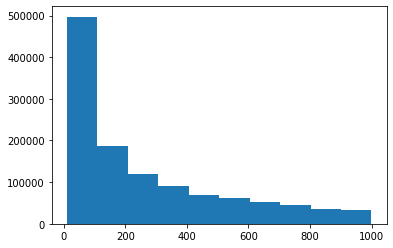

In [9]:
plt.hist(balanced_lsa_df['Va'])

0
1


/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_50490/2996769169.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balancedDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'darkcyan', ax = axs[count], label='Balanced')
/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_50490/2996769169.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
htt

2
3
4
5
6
7
8
9
10
11
12
13


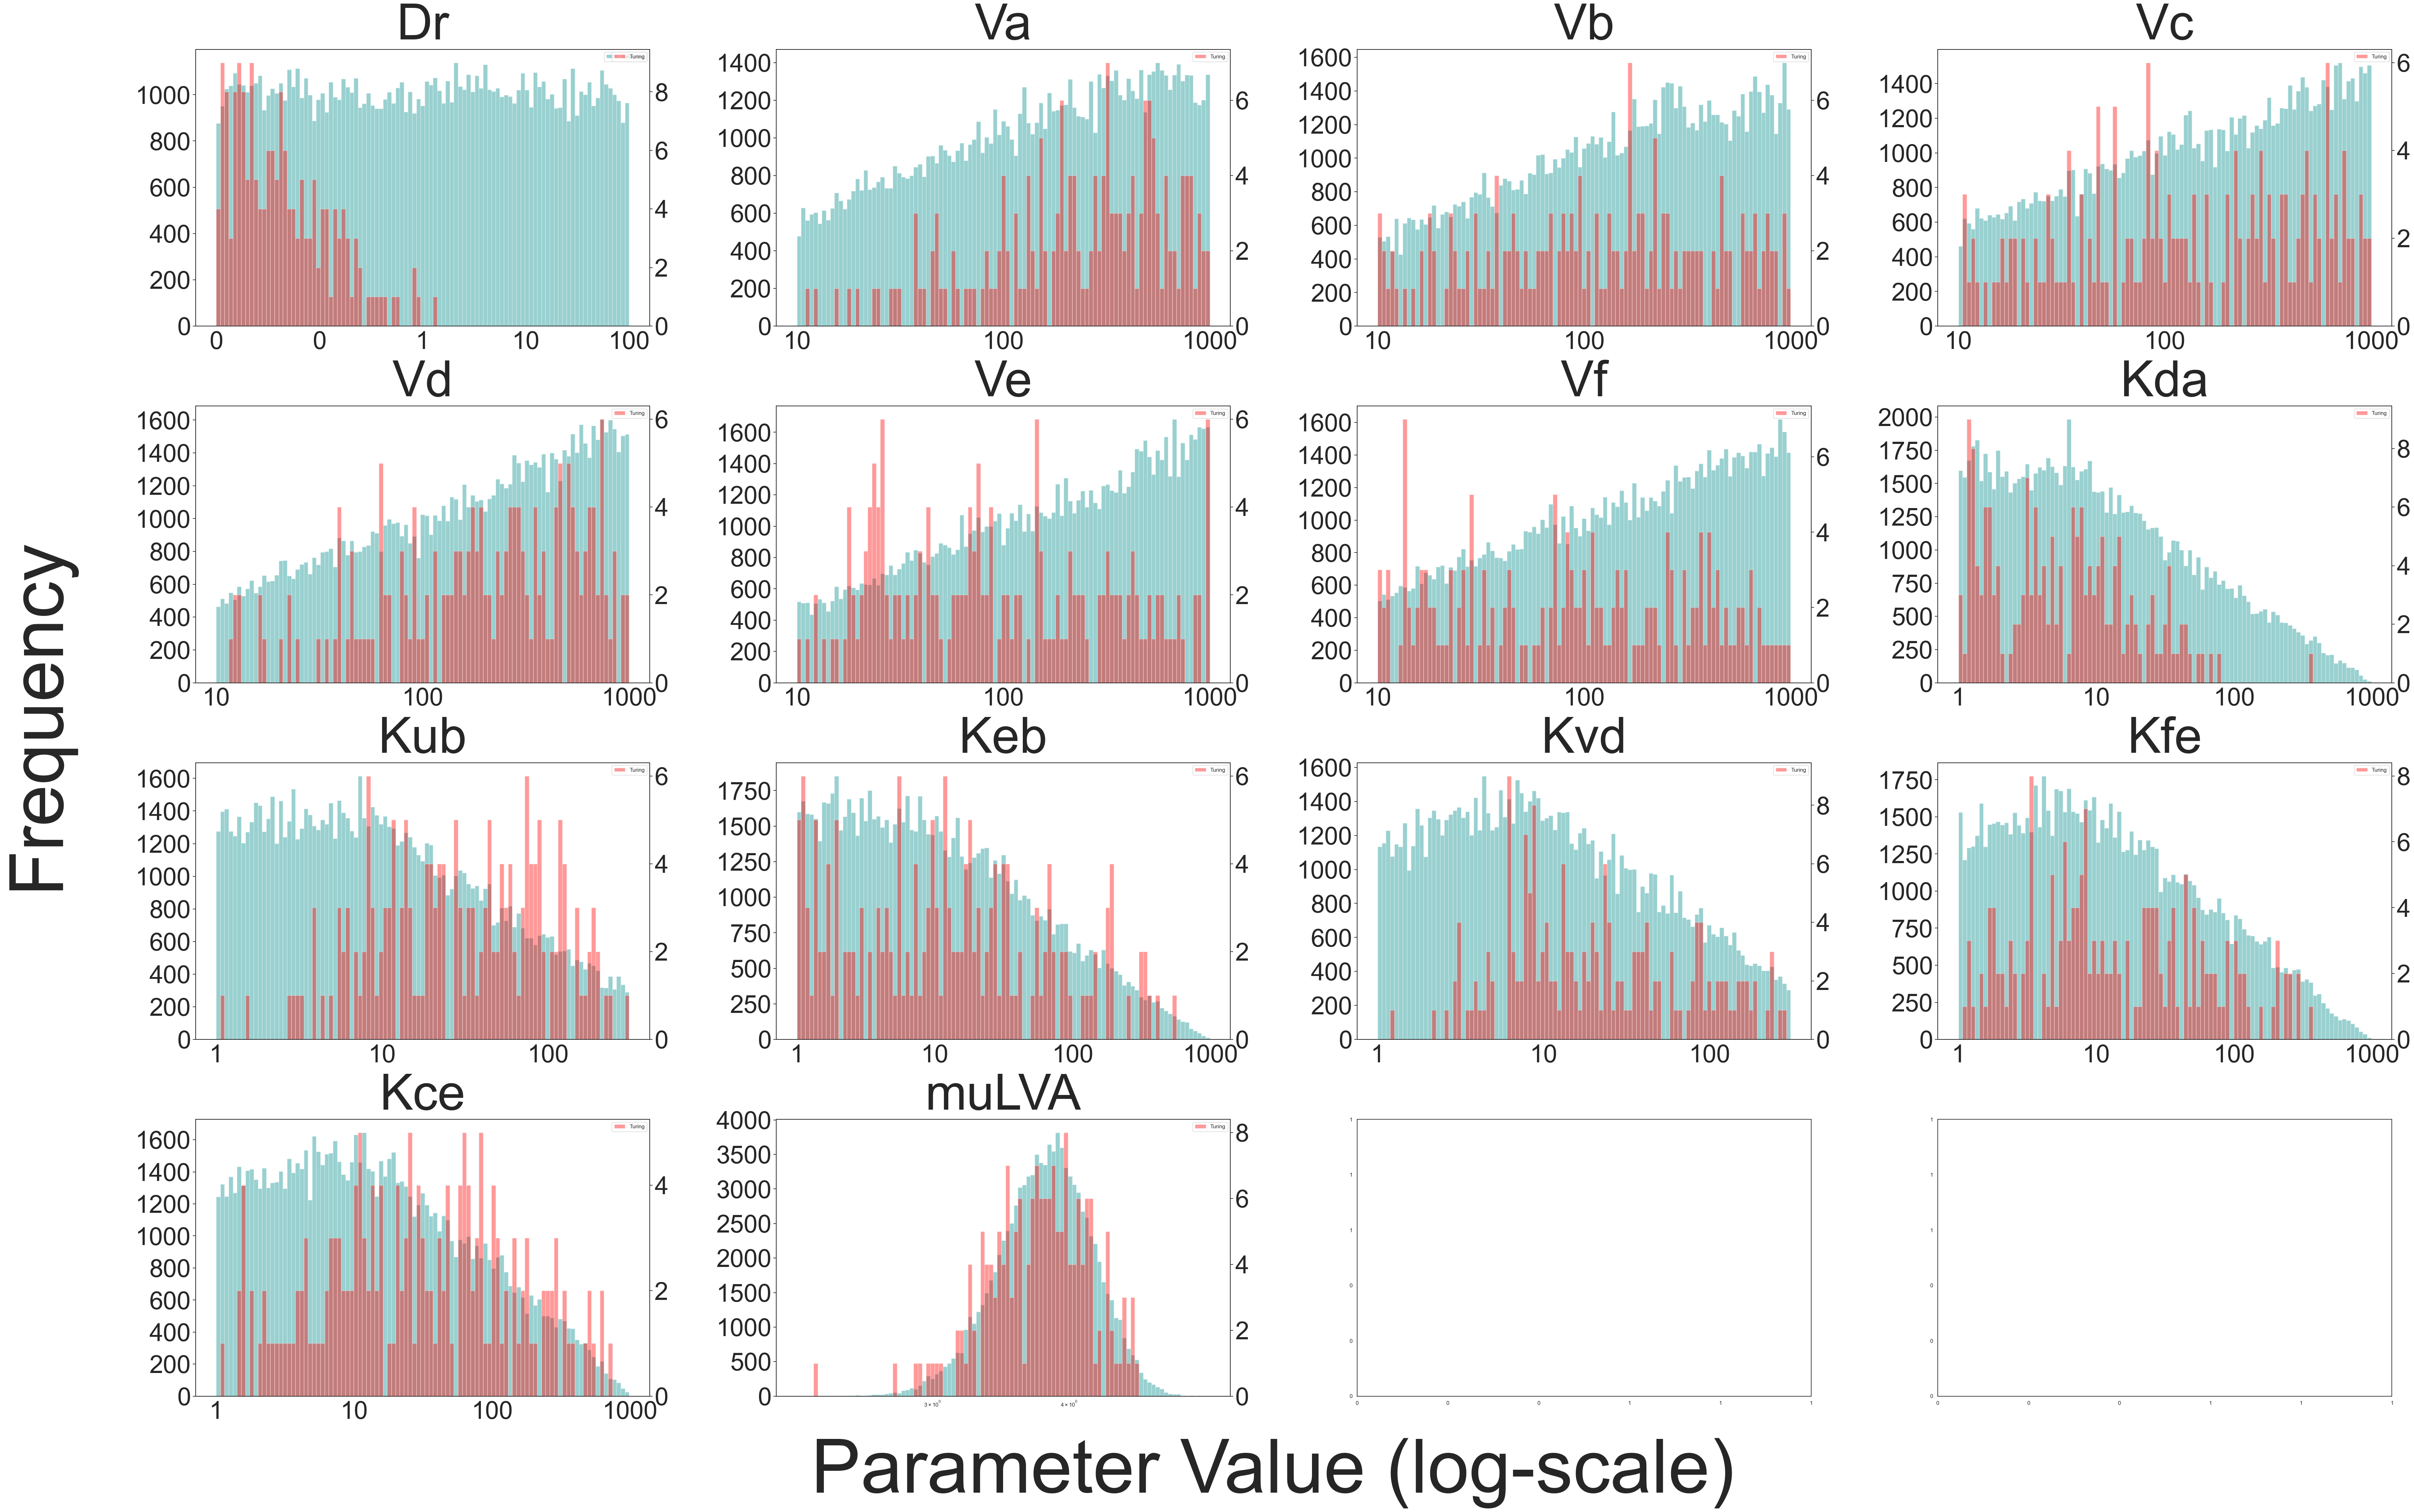

In [19]:
from scipy import stats
def paramsHistogram(paramList, balancedDf,specificDf,crop=100000):
    sns.set(style="white", palette="muted", color_codes=False)

    fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(65,40))
    axs = axs.flatten()
    # palette = sns.diverging_palette(10, 220, n=2)

    # paramList=['Dr','VA','VB','VC','VD','VE','VF', 'Kda','Kab', 'Keb', 'Kbd', 'Kfe', 'Kee', 'Kce', 'muLVA']
    df_concat = pd.concat([balancedDf,specificDf])
    # df_concat[(np.abs(stats.zscore(df_concat)) < 3).all(axis=1)]
    # df_concat[np.abs(df_concat.Data-df_concat.Data.mean()) <= (3*df_concat.Data.std())]

    for count, parameter in enumerate(paramList):
        print(count)
    # for count, parameter in enumerate(lsa_df.columns[:24]):
        # q = df_concat[parameter].quantile(0.3)
        # df_concat[df_concat[parameter] < q]
        # LogMin, LogMax = np.log10(df_concat.iloc[:,count].min()),np.log10(df_concat.iloc[:,count].max())
        # newBins = np.logspace(LogMin/10, LogMax,100)
        min_val = df_concat.iloc[:crop, count].min()
        max_val = df_concat.iloc[:crop, count].max()
        
        newBins = np.logspace(np.log10(min_val), np.log10(max_val), 100)
        
        sns.distplot(balancedDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'darkcyan', ax = axs[count], label='Balanced')
        axs2 = axs[count].twinx()
        sns.distplot(specificDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'red', ax = axs2, label='Turing')

        axs[count].set_xscale('log')
        axs[count].set_yticklabels(axs[count].get_yticks(), size = 50)
        axs[count].set_xticklabels(axs[count].get_xticks(), size = 50)

        axs[count].set_title(str(parameter),fontsize=100)
        axs[0].legend()
        axs2.legend(loc='upper right')
        axs2.tick_params(axis='y', labelsize=50)        

    fig.tight_layout()
    fig.text(0.5,-0.03, "Parameter Value (log-scale)", ha="center", va="center",  fontsize=150)
    fig.text(-0.03,0.5, "Frequency", ha="center", va="center", rotation=90 ,fontsize=150)
        # Define a custom axis label formatting function
    def format_func(value, tick_number):
        # Format the tick labels without trailing decimals
        return '{:.0f}'.format(value)

    # Apply the custom formatting function to the x-axis and y-axis of all subplots
    for ax in axs:
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

    plt.savefig(modellingpath + '/3954/paper/out/analytical/pyPlots/paramDistributions_balanced_instability.pdf')
    plt.show()

crop=100000
balanced_lsa_df_crop = balanced_lsa_df[paramList].iloc[:crop]
instabilities_df_crop = instabilities_df[paramList].iloc[:crop]
turing_df_crop = turing_df[paramList].iloc[:crop]


# paramsHistogram(paramList, balanced_lsa_df,instabilities_df,fit_df,instabilities_fit_df, 'Instabilities',crop=crop)
paramsHistogram(paramList, balanced_lsa_df_crop,turing_df_crop, crop=crop)



In [13]:
np.amin(turing_df['Dr'])

0.01032553844739343

0
1
2
3


/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_32113/2751798641.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fitDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'black', ax = axs[count], label='Fit')
/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_32113/2751798641.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[count].set_yticklabels(axs[count].get_yticks(), size = 70)
/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_32113/2751798641.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[count].set_xticklabels(axs[co

4
5
6
7


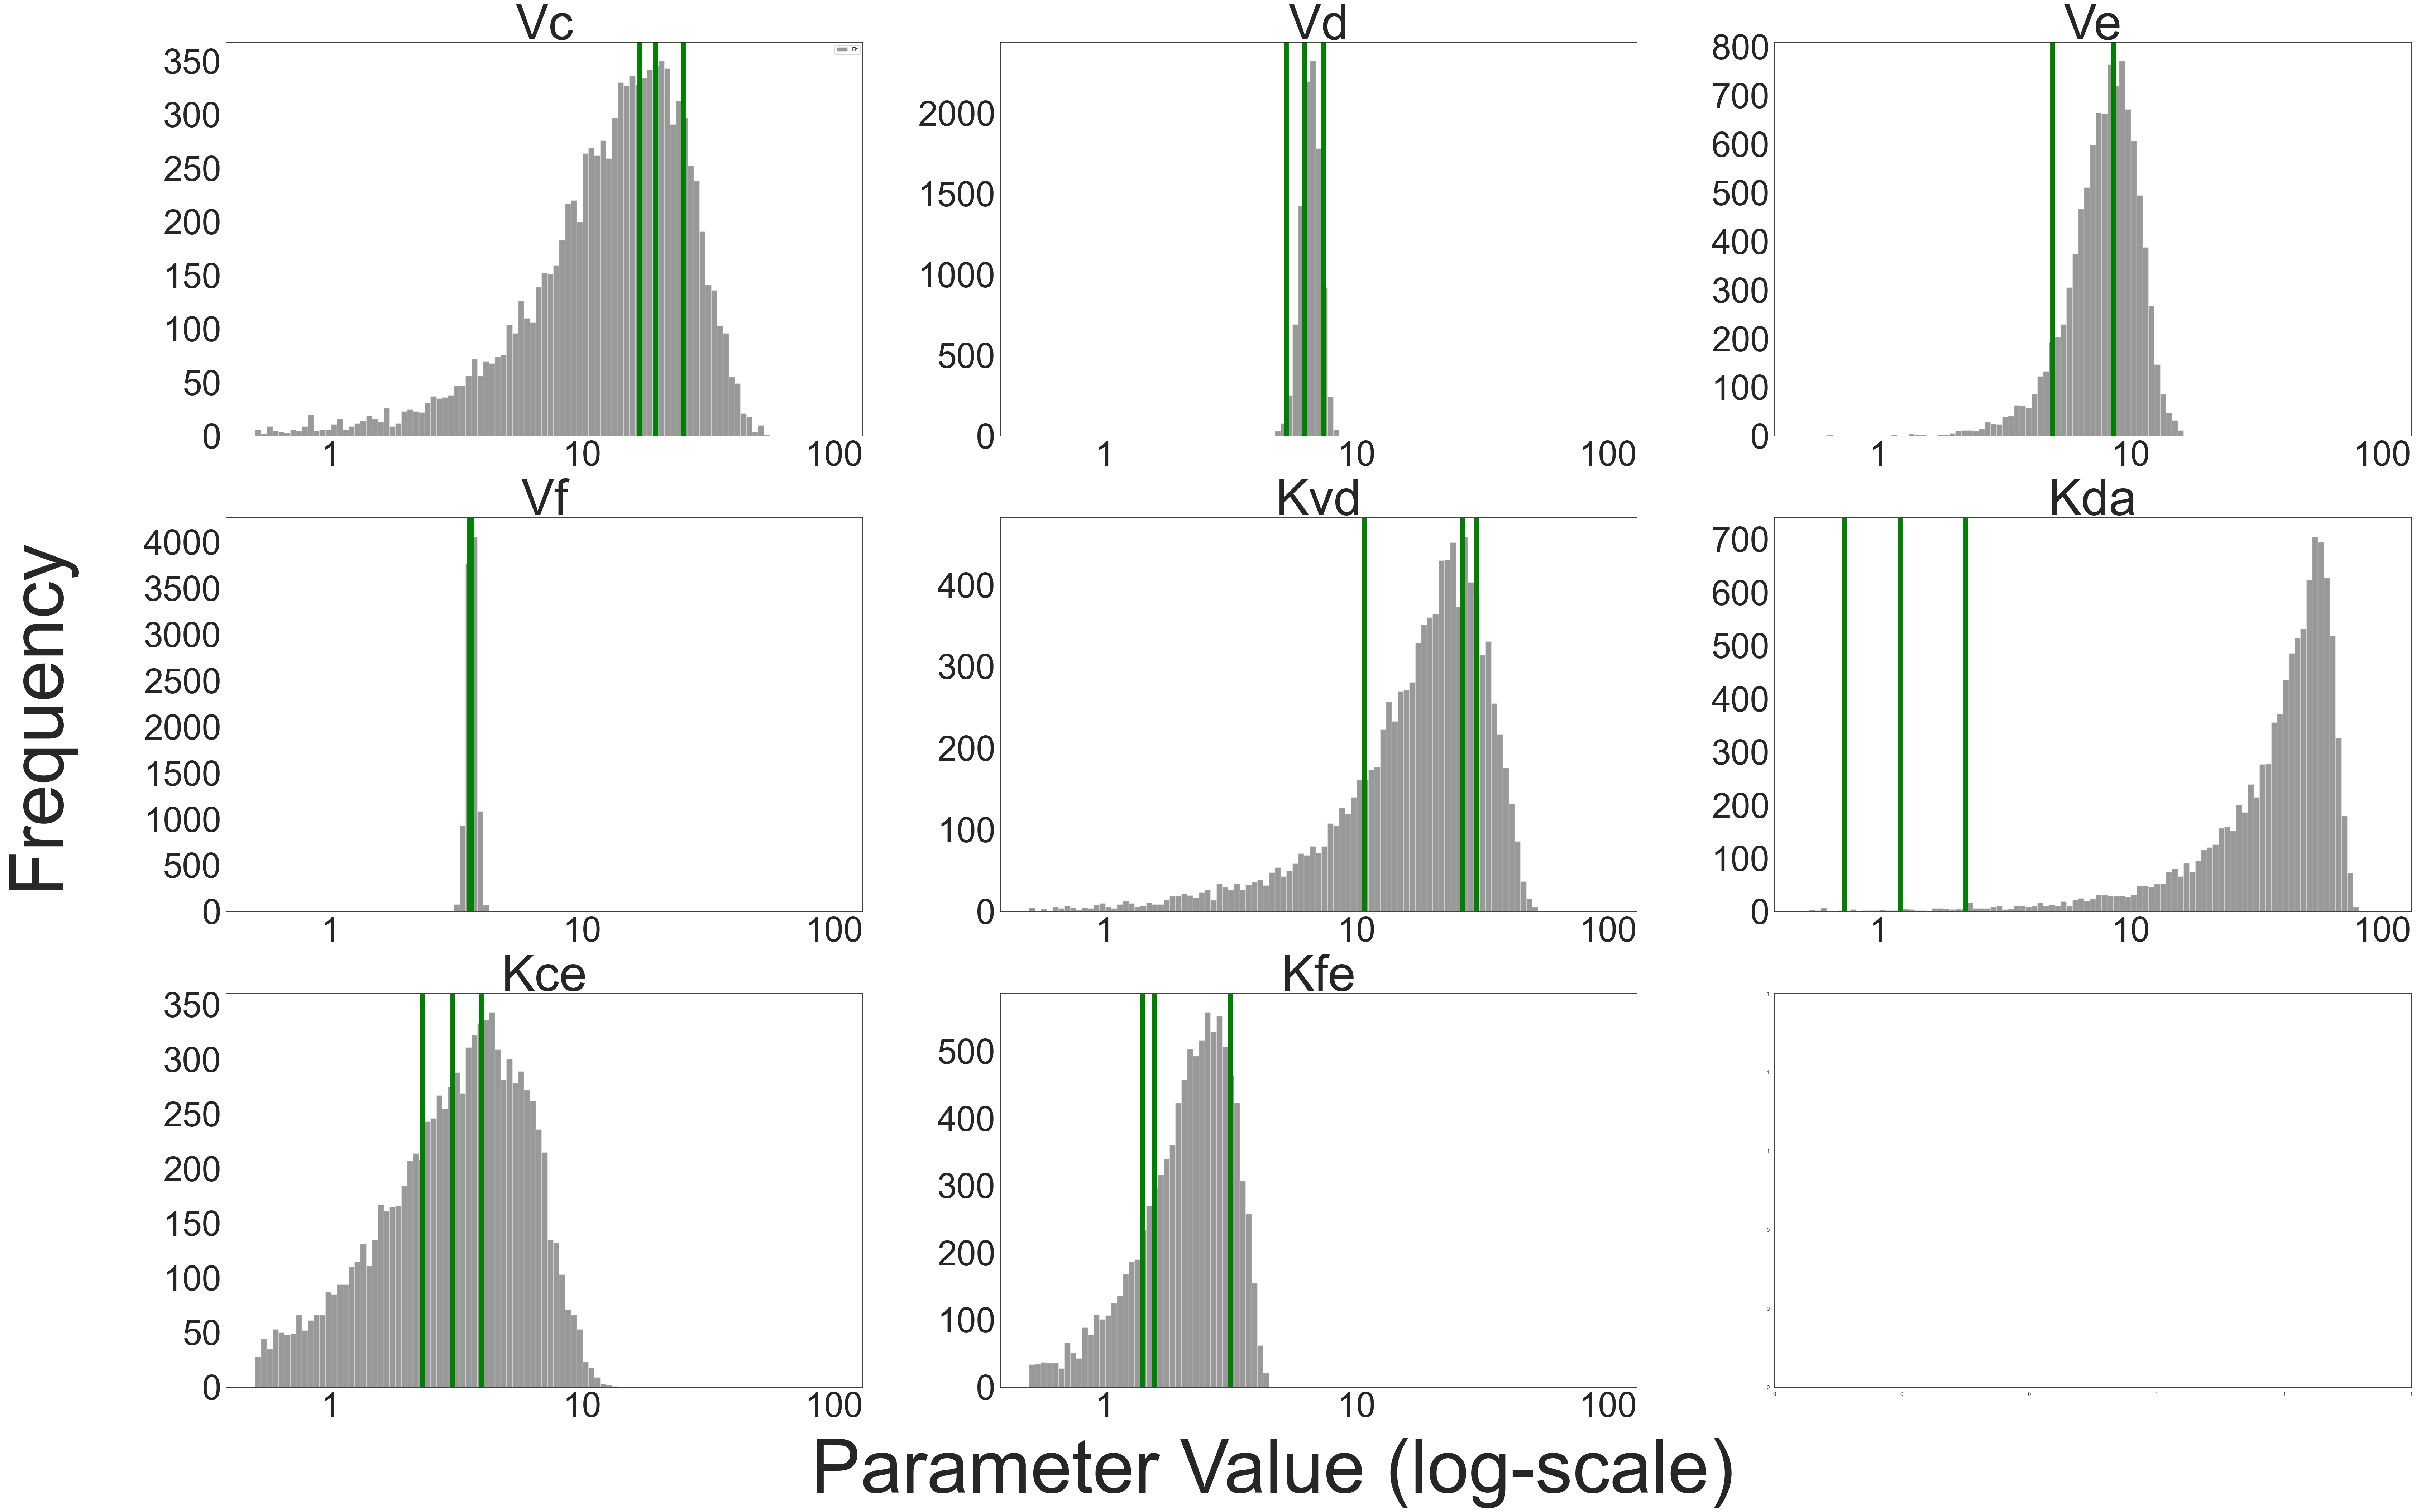

In [106]:
from scipy import stats
def paramsHistogram(balancedDf,specificDf,fitDf,instabilitiesFitDf, title,crop=2000):
    sns.set(style="white", palette="muted", color_codes=False)

    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(65,40))
    axs = axs.flatten()
    palette = sns.diverging_palette(10, 220, n=2)
    # paramList=['Dr','VA','VB','VC','VD','VE','VF', 'Kda','Kab', 'Keb', 'Kbd', 'Kfe', 'Kee', 'Kce', 'muLVA']
    df_concat = pd.concat([balancedDf,specificDf,fitDf, instabilitiesFitDf])
    # df_concat[(np.abs(stats.zscore(df_concat)) < 3).all(axis=1)]
    # df_concat[np.abs(df_concat.Data-df_concat.Data.mean()) <= (3*df_concat.Data.std())]

    for count, parameter in enumerate(paramList):
        print(count)
    # for count, parameter in enumerate(lsa_df.columns[:24]):
        q = df_concat[parameter].quantile(0.3)
        df_concat[df_concat[parameter] < q]
        LogMin, LogMax = np.log10(df_concat.iloc[:,count].min()),np.log10(df_concat.iloc[:,count].max())
        # newBins = np.logspace(LogMin/10, LogMax,100)
        newBins = np.logspace(-0.3,2,100)
        sns.distplot(fitDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'black', ax = axs[count], label='Fit')
        # sns.distplot(balancedDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'darkcyan', ax = axs[count], label='Balanced')
        # sns.distplot(specificDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'red', ax = axs[count], label=title)
        # sns.distplot(instabilitiesFitDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'green', ax = axs[count], label=title)
        # sns.distplot(fitDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'black', ax = axs[count], label='Fit')
        axs[count].axvline(instabilitiesFitDf.iloc[0,count], color='green' )

        axs[count].set_xscale('log')
        axs[count].set_yticklabels(axs[count].get_yticks(), size = 70)
        axs[count].set_xticklabels(axs[count].get_xticks(), size = 70)

        axs[count].set_title(str(parameter),fontsize=100)
        axs[0].legend()
        axs[count].axvline(instabilitiesFitDf.iloc[0,count], color='green', linewidth = 10)
        axs[count].axvline(instabilitiesFitDf.iloc[1,count], color='green', linewidth = 10)
        axs[count].axvline(instabilitiesFitDf.iloc[2,count], color='green', linewidth = 10)
    # fig.suptitle(title, fontsize=50)
    fig.tight_layout()
    fig.text(0.5,-0.03, "Parameter Value (log-scale)", ha="center", va="center",  fontsize=150)
    fig.text(-0.03,0.5, "Frequency", ha="center", va="center", rotation=90 ,fontsize=150)


    def format_func(value, tick_number):
        # Format the tick labels without trailing decimals
        return '{:.0f}'.format(value)

    # Apply the custom formatting function to the x-axis and y-axis of all subplots
    for ax in axs:
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

    plt.savefig(modellingpath + '/3954/paper/out/analytical/pyPlots/paramDistributions_fit_turingfit.pdf')
    plt.show()

crop=10000
balanced_lsa_df = balanced_lsa_df[paramList].iloc[:crop]
instabilities_df = instabilities_df[paramList].iloc[:crop]
turing_df = turing_df[paramList].iloc[:crop]
fit_df= fit_df[paramList].iloc[:crop]
instabilities_fit_df= instabilities_fit_df[paramList].iloc[:crop]

# balanced_lsa_df = balanced_lsa_df.iloc[:crop]
# instabilities_df = instabilities_df[paramList]
# turing_df = turing_df[paramList]
# fit_df= fit_df[paramList]
# instabilities_fit_df= instabilities_fit_df[paramList]


paramsHistogram(balanced_lsa_df,instabilities_df,fit_df,instabilities_fit_df, 'Instabilities',crop=crop)



In [ ]:
from scipy import stats
def paramsHistogram(balancedDf,specificDf,fitDf,instabilitiesFitDf, title,crop=2000):
    sns.set(style="white", palette="muted", color_codes=False)

    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(65,40))
    axs = axs.flatten()
    palette = sns.diverging_palette(10, 220, n=2)
    # paramList=['Dr','VA','VB','VC','VD','VE','VF', 'Kda','Kab', 'Keb', 'Kbd', 'Kfe', 'Kee', 'Kce', 'muLVA']
    df_concat = pd.concat([balancedDf,specificDf,fitDf, instabilitiesFitDf])
    # df_concat[(np.abs(stats.zscore(df_concat)) < 3).all(axis=1)]
    # df_concat[np.abs(df_concat.Data-df_concat.Data.mean()) <= (3*df_concat.Data.std())]

    for count, parameter in enumerate(paramList):
    # for count, parameter in enumerate(lsa_df.columns[:24]):
        q = df_concat[parameter].quantile(0.3)
        df_concat[df_concat[parameter] < q]
        LogMin, LogMax = np.log10(df_concat.iloc[:,count].min()),np.log10(df_concat.iloc[:,count].max())
        # newBins = np.logspace(LogMin/10, LogMax,100)
        newBins = np.logspace(-0.3,3,100)
        sns.distplot(fitDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'black', ax = axs[count], label='Fit')
        sns.distplot(balancedDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'darkcyan', ax = axs[count], label='Balanced')
        sns.distplot(specificDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'red', ax = axs[count], label=title)
        # sns.distplot(instabilitiesFitDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'green', ax = axs[count], label=title)
        # sns.distplot(fitDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'black', ax = axs[count], label='Fit')
        axs[count].axvline(instabilitiesFitDf.iloc[0,count], color='green' )

        axs[count].set_xscale('log')
        axs[count].set_yticklabels(axs[count].get_yticks(), size = 70)
        axs[count].set_xticklabels(axs[count].get_xticks(), size = 70)

        axs[count].set_title(str(parameter),fontsize=100)
        axs[0].legend()
        axs[count].axvline(instabilitiesFitDf.iloc[0,count], color='green', linewidth = 10)
        axs[count].axvline(instabilitiesFitDf.iloc[1,count], color='green', linewidth = 10)
        axs[count].axvline(instabilitiesFitDf.iloc[2,count], color='green', linewidth = 10)
    # fig.suptitle(title, fontsize=50)
    fig.tight_layout()
    fig.text(0.5,-0.03, "Parameter Value (log-scale)", ha="center", va="center",  fontsize=150)
    fig.text(-0.03,0.5, "Frequency", ha="center", va="center", rotation=90 ,fontsize=150)
    plt.savefig(modellingpath + '/3954/paper/out/analytical/pyPlots/paramDistributions_balanced_instability_fit_turingfit.pdf')
    plt.show()

crop=1000
balanced_lsa_df = balanced_lsa_df[paramList].iloc[:crop]
instabilities_df = instabilities_df[paramList].iloc[:crop]
turing_df = turing_df[paramList].iloc[:crop]
fit_df= fit_df[paramList].iloc[:crop]
instabilities_fit_df= instabilities_fit_df[paramList].iloc[:crop]

# balanced_lsa_df = balanced_lsa_df.iloc[:crop]
# instabilities_df = instabilities_df[paramList]
# turing_df = turing_df[paramList]
# fit_df= fit_df[paramList]
# instabilities_fit_df= instabilities_fit_df[paramList]


paramsHistogram(balanced_lsa_df,instabilities_df,fit_df,instabilities_fit_df, 'Instabilities',crop=crop)



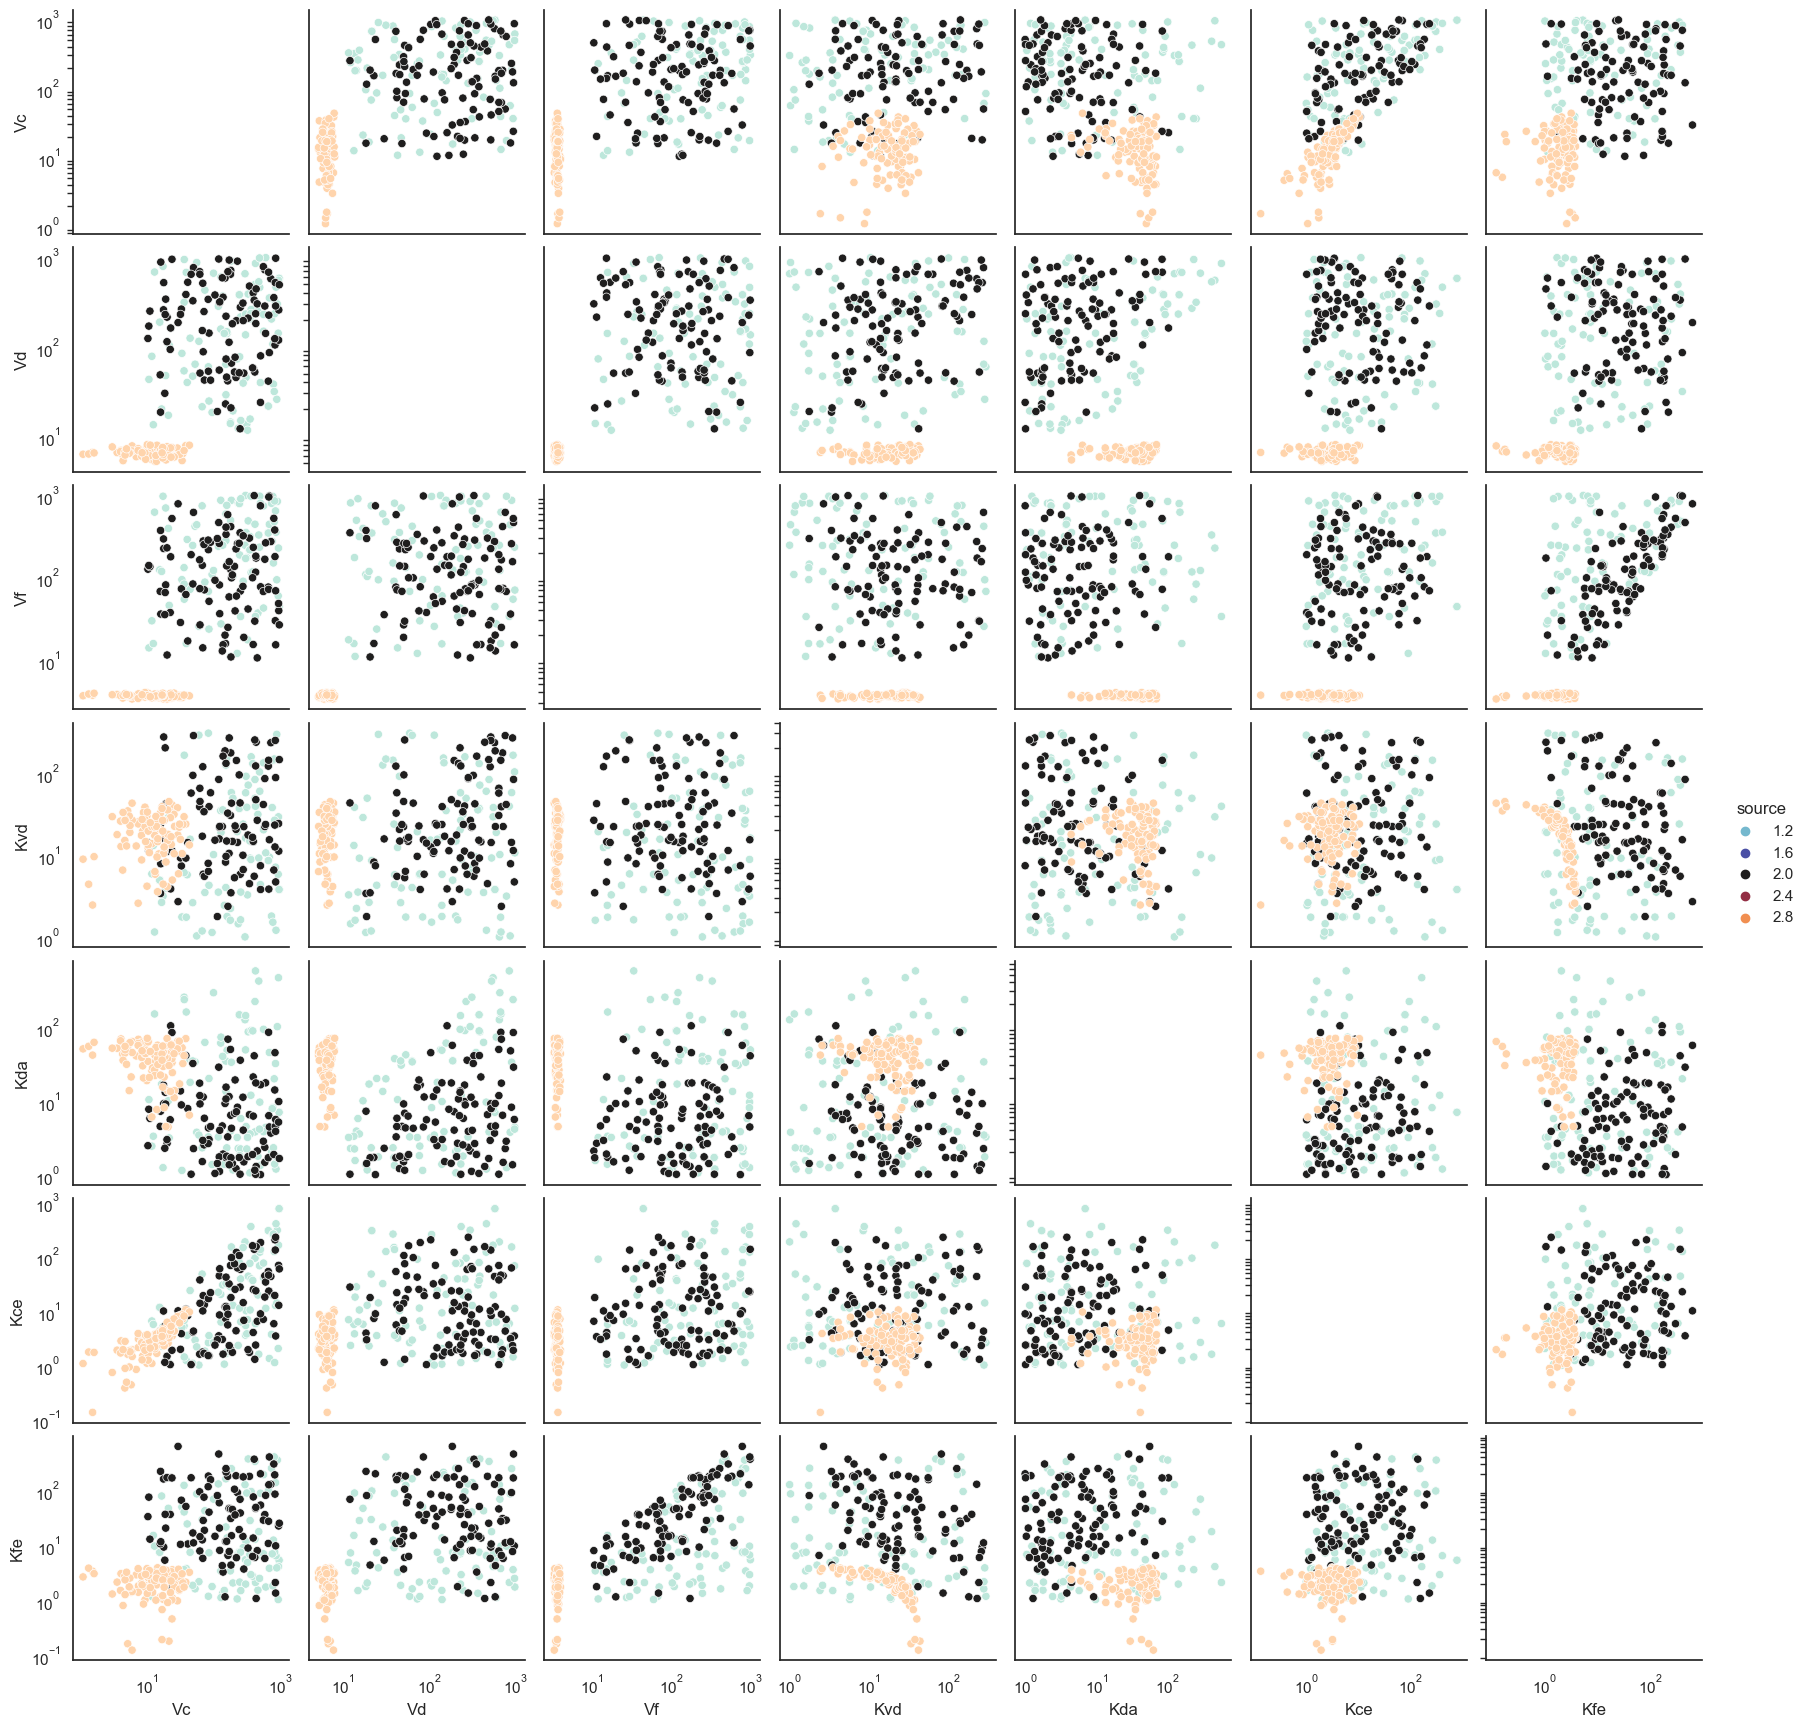

In [9]:
balanced_lsa_df = balanced_lsa_df[paramList]
instabilities_df = instabilities_df[paramList]
fit_df = fit_df[paramList]
balanced_lsa_df_drop = balanced_lsa_df.droplevel(level=1)
# balanced_lsa_df_drop = balanced_lsa_df_drop.reset_index(inplace=True, drop=True)
instabilities_df_drop = instabilities_df.droplevel(level=1)
# instabilities_df_drop = instabilities_df_drop.reset_index(inplace=True, drop=True)
fit_df_drop = fit_df.reset_index()
crop=100
sourcelist = np.concatenate((np.random.normal(loc=1,size=crop,scale=0.0001), np.random.normal(loc=2,size=crop,scale=0.0001), np.random.normal(loc=3,size=crop,scale=0.0001)))
# sourcelist = np.concatenate(([1]*crop, [2]*crop ,[3]*crop))



concat_df = pd.concat([balanced_lsa_df_drop.iloc[:crop], instabilities_df_drop.iloc[:crop],fit_df[:crop]], ignore_index=True, axis=0)
concat_df['source'] = sourcelist
concat_df
pairplot = sns.pairplot(concat_df, hue='source', palette="icefire")
for ax in pairplot.axes.flat:
    ax.set(xscale="log")
    ax.set(yscale="log")
# sns.pairplot(data=concat_df, hue='source', palette="Paired")
plt.show()

In [10]:
def xstar(mm=10,k1=0.0183, Du=1, mua=0.3, muu = 0.0225):
    xstar = mm/np.sqrt(k1*Du/(mua*muu))
    return xstar

xstar = xstar(Du=0.09)
xstar

20.244408254472898